In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os 
os.chdir("D:\Simplilearn\Machine Learning\Time Series")

In [3]:
IndiaCovid=pd.read_csv("India.csv")

In [4]:
IndiaCovid.head()

,Date,ConfirmedCases
0,30/01/2020,1
1,31/01/2020,1
2,01/02/2020,1
3,02/02/2020,2
4,03/02/2020,3


In [5]:
print(IndiaCovid.shape)

(470, 2)


In [6]:
# Time Series Data - First Column or Indexed Column must be Date
IndiaCovid.Date=pd.to_datetime(IndiaCovid.Date)

In [7]:
#date as index
IndiaCovid.index=IndiaCovid.Date

In [8]:
IndiaCovid.head()

,Date,ConfirmedCases
Date,,
2020-01-30,2020-01-30,1
2020-01-31,2020-01-31,1
2020-01-02,2020-01-02,1
2020-02-02,2020-02-02,2
2020-03-02,2020-03-02,3


In [9]:
# dropping the date column
IndiaCovid=IndiaCovid.drop('Date',axis=1)

In [10]:
print(IndiaCovid.shape)

(470, 1)


In [11]:
IndiaCovid.head()

,ConfirmedCases
Date,
2020-01-30,1
2020-01-31,1
2020-01-02,1
2020-02-02,2
2020-03-02,3


<AxesSubplot:xlabel='Date'>

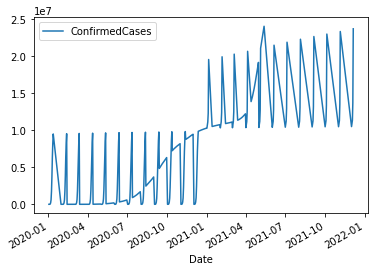

In [12]:
IndiaCovid.plot(kind='line')

In [13]:
# its cumulative data so, taking only each day's data by substracting 
IndiaCovid['dailyCases']=IndiaCovid['ConfirmedCases']-IndiaCovid['ConfirmedCases'].shift(1)

In [14]:
IndiaCovid.head()

,ConfirmedCases,dailyCases
Date,,
2020-01-30,1,NaN
2020-01-31,1,0.0
2020-01-02,1,0.0
2020-02-02,2,1.0
2020-03-02,3,1.0


<AxesSubplot:xlabel='Date'>

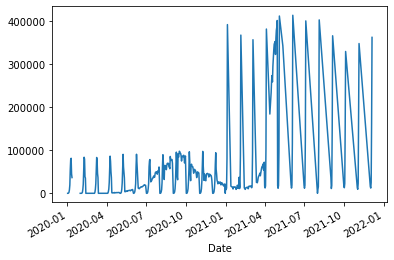

In [15]:
#plotting the daily cases
IndiaCovid.dailyCases.plot(kind='line')

In [16]:
IndiaCovid.dailyCases.describe()

count       469.000000
mean      51272.511727
std       82816.383588
min           0.000000
25%        6629.000000
50%       23067.000000
75%       57711.000000
max      414188.000000
Name: dailyCases, dtype: float64

In [17]:
# This is Univariate Time Series Analysis. So, Data must be Stationary.
# Test for Stationarity of Time Series - Augmented Dickey-Fuller test or 
# Kwiatkowski-Phillips-Schmidt-Shin test shuld be implemented 
# here carried out Augmented Dickey Fuller test as follows

In [18]:
from statsmodels.tsa.stattools import adfuller

In [19]:
#dropping null values 
IndiaCovid=IndiaCovid.dropna()

In [20]:
adfuller(IndiaCovid.dailyCases)

(-5.401349256992187,
 3.3651714228780003e-06,
 14,
 454,
 {'1%': -3.444836032925901,
  '5%': -2.8679272692747415,
  '10%': -2.5701721745036776},
 8939.646318695539)

In [21]:
#calculate Difference Time Series
IndiaCoviddiff=IndiaCovid.dailyCases.diff()

In [22]:
adfuller(IndiaCoviddiff.dropna()) 

(-3.921519091597915,
 0.0018820640332601524,
 18,
 449,
 {'1%': -3.4449982835447894,
  '5%': -2.8679986379826814,
  '10%': -2.5702102140862397},
 8940.71646894358)

In [23]:
# Since p-value =0.0018820640332602244 less than 0.05, Reject Null hypothesis

In [24]:
# Decomposition of Time Series - Breaking Time Series Components
# Trend
# Seasonality 
# Cyclicality 
# Residual or Error 
from statsmodels.tsa.seasonal import seasonal_decompose

In [25]:
IndiaCovidDecompose=seasonal_decompose(IndiaCoviddiff.dropna(),
                                     model='additive',period=30)

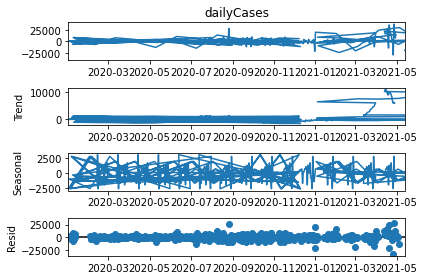

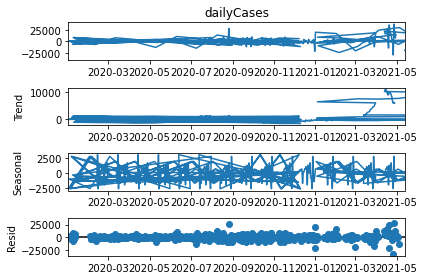

In [26]:
IndiaCovidDecompose.plot()

In [27]:
# this plot not giving any insight 

In [28]:
trail = IndiaCovid.reset_index() # Remove the index
trail.Date = pd.to_datetime(trail.Date) # Converted Date to Datetime
trail.dropna(inplace = True) # DropNAs
trail.Date = pd.DatetimeIndex(trail.Date) # Date Indexing 
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(trail.dailyCases, model='additive', 
                            period = 30) 

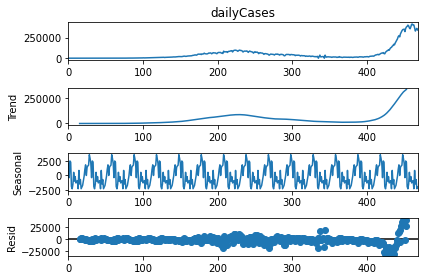

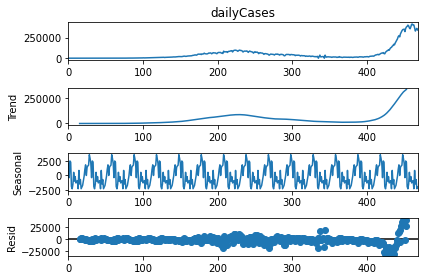

In [29]:
result.plot()

In [ ]:
# from the graph
# Trend is Upward
# No Seasonal Component
# Residuals are Closer to Line

In [30]:
# Autocorrelation is corealtion between the y and lag of y
# pacf is results after removing the effect of any correlations due to the terms at shorter lags.
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

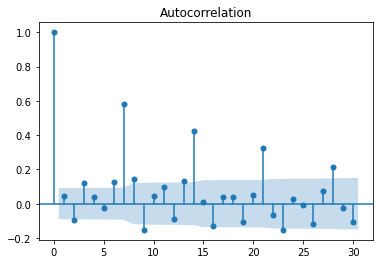

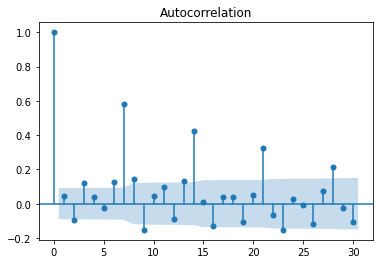

In [31]:
plot_acf(IndiaCoviddiff.dropna(),lags=30)

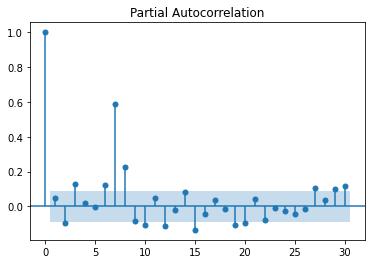

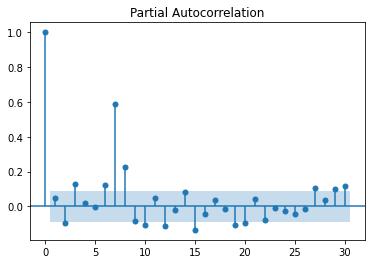

In [32]:
plot_pacf(IndiaCoviddiff.dropna(),lags=30)

In [33]:
# AUTOREGRESSIVE INTEGRATED MOVING AVERAGE - ARIMA depends on (p,d,q) and o/p gives the best fit model 
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

In [34]:
model=pm.auto_arima(IndiaCovid.dailyCases,start_p=0, start_q=0, test='adf', max_p=5, max_q=5,m=1,
                   d=None,
                   start_P=0,
                   D=0,
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=11956.233, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=11617.325, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=12106.687, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=9694.368, Time=0.40 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=9681.739, Time=0.61 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=9683.209, Time=0.62 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=9683.233, Time=0.74 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=9691.995, Time=0.42 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=9701.316, Time=0.52 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=9680.516, Time=0.35 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=9693.051, Time=0.32 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf

In [35]:
print(model.summary())
# Alkaikes Information Criterion  - Model that has Lowest AIC is best model

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  469
Model:               SARIMAX(2, 0, 1)   Log Likelihood               -4836.258
Date:                Thu, 27 May 2021   AIC                           9680.516
Time:                        21:59:25   BIC                           9697.118
Sample:                             0   HQIC                          9687.048
                                - 469                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2057      0.042      4.879      0.000       0.123       0.288
ar.L2          0.7932      0.042     18.850      0.000       0.711       0.876
ma.L1          0.9090      0.037     24.581      0.0

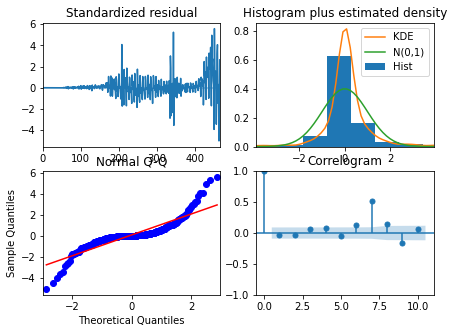

In [36]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

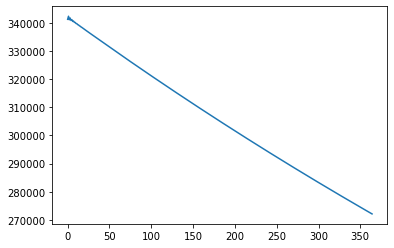

In [37]:
# predicting the trend for the upcoming 365 days
n_periods=365
fc,confint=model.predict(n_periods=n_periods,return_conf_int=True)
plt.plot(fc)  # can see trend is going downwords 

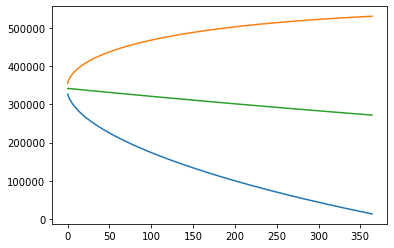

In [38]:
plt.plot(confint)
plt.plot(fc) # printing the trend within maximum possible range to minimum possible range 

In [39]:
#plotting data of dailycases with the prection of the cases trend 
index_of_fc=np.arange(len(IndiaCovid.dailyCases),
                       len(IndiaCovid.dailyCases)+n_periods)

In [40]:
fc_series=pd.Series(fc,index=index_of_fc)
lower_series=pd.Series(confint[:,0],index=index_of_fc)
upper_series=pd.Series(confint[:,1],index=index_of_fc)

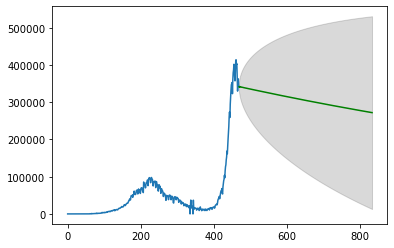

In [41]:
plt.plot(IndiaCovid.dailyCases.values)
plt.plot(fc_series,color='green')
plt.fill_between(lower_series.index,
                lower_series,
                upper_series,
                color='k',
                alpha=.15)
plt.show()